# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Files

In [2]:
Games = pd.read_csv("Games.csv")
Reviews = pd.read_csv("Reviews.csv")
Items = pd.read_parquet("Items.parquet")

# Functions

In [57]:
from textblob import TextBlob

# Sentiment Analysis
def sentiment_analysis(x):
    analysis = TextBlob(x)

    sentiment = analysis.sentiment.polarity

    if sentiment > 0.1:
        return 2
    elif sentiment < -0.1:
        return 0
    else:
        return 1


# Outliers
def iqr(data):
    return pd.DataFrame(data).quantile(q=[0.25, 0.75])[1] - pd.DataFrame(data).quantile(q=[0.25, 0.75])[0]

def null_ratio(Dataset):
    null_ratio = ((Dataset.isnull().sum() / len(Dataset))*100).sort_values(ascending=False)
    return null_ratio

# Games

In [4]:
Games.isnull().sum()

publisher       4916
genres             0
app_name           1
title              1
release_date     303
tags              24
price           1230
early_access       0
developer        170
release_year     303
dtype: int64

In [5]:
Games.shape

(28852, 10)

In [6]:
null_cols = ["publisher", "app_name", "title", "release_date", "tags", "price", "developer", "release_year"]

nulls = Games[null_cols].fillna("No Data")

Games_aux = pd.concat([Games.drop(null_cols, axis=1), nulls], axis=1)

In [7]:
Games_aux.isnull().sum()

genres          0
early_access    0
publisher       0
app_name        0
title           0
release_date    0
tags            0
price           0
developer       0
release_year    0
dtype: int64

In [8]:
Games_aux.head(3)

,genres,early_access,publisher,app_name,title,release_date,tags,price,developer,release_year
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",0.0,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.99,Kotoshiro,2018.0
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",0.0,"Making Fun, Inc.",Ironbound,Ironbound,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",Free To Play,Secret Level SRL,2018.0
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",0.0,Poolians.com,Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",Free to Play,Poolians.com,2017.0


In [17]:
genres = Games.explode('genres')
# genres.to_frame
genres.head(3)

,publisher,genres,app_name,title,release_date,tags,price,early_access,developer,release_year
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",4.99,0.0,Kotoshiro,2018.0
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",Free To Play,0.0,Secret Level SRL,2018.0
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",Free to Play,0.0,Poolians.com,2017.0


In [18]:
genres.shape

(28852, 10)

In [20]:
genres_aux = genres[['app_name','title','genres','publisher','developer','price']].copy()


In [21]:
genres_aux.head(3)

,app_name,title,genres,publisher,developer,price
0,Lost Summoner Kitty,Lost Summoner Kitty,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Kotoshiro,Kotoshiro,4.99
1,Ironbound,Ironbound,"['Free to Play', 'Indie', 'RPG', 'Strategy']","Making Fun, Inc.",Secret Level SRL,Free To Play
2,Real Pool 3D - Poolians,Real Pool 3D - Poolians,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Poolians.com,Poolians.com,Free to Play


In [24]:
genres_aux['genres'].value_counts()
genres_aux.to_frame

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [28]:
# Year of Launch

Games_quantity = Games_aux['release_year'].value_counts()
Games_quantity.to_frame

<bound method Series.to_frame of release_year
2017.0     9208
2016.0     6691
2015.0     4794
2014.0     2728
2013.0     1477
2012.0     1138
2011.0      541
2010.0      393
2009.0      316
No Data     303
2008.0      194
2007.0      149
2006.0      142
2018.0       92
2005.0       92
2003.0       74
2004.0       64
2001.0       59
1998.0       50
1999.0       48
2002.0       42
1997.0       39
1996.0       35
2000.0       35
1994.0       32
1995.0       31
1993.0       25
1992.0       13
1991.0       12
1990.0       10
1989.0        7
1988.0        5
1987.0        4
2019.0        3
1984.0        2
1983.0        1
1986.0        1
2021.0        1
1985.0        1
Name: count, dtype: int64>

In [34]:
Games_quantity = Games_quantity.sort_index()

plt.figure(figsize=(14, 5))

sns.barplot(x=Games_quantity.index, y=Games_quantity.values, palette=("black"))
plt.xlabel('Release Year') ; plt.ylabel('Quantity Games') ; plt.title('Games Launched Per Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

AttributeError: 'Index' object has no attribute 'index'

<Figure size 1400x500 with 0 Axes>

In [35]:
Games_aux.columns

Index(['genres', 'early_access', 'publisher', 'app_name', 'title',
       'release_date', 'tags', 'price', 'developer', 'release_year'],
      dtype='object')

In [39]:
unique_games = len(Games_aux['title'].unique())
unique_games

28828

In [40]:
most_expensive = Games_aux[['app_name', 'price']]
most_expensive = most_expensive.drop_duplicates()
most_expensive.sort_values(by = ['price'], inplace=True,ascending=False)
most_expensive.head()

,app_name,price
3833,Parcel - Soundtrack,Third-party
28582,Peggle Extreme,Third-party
19884,Legends of Callasia,Play the Demo
929,The Lord of the Rings Online™,Play for Free!
941,Dungeons & Dragons Online®,Play for Free!


In [43]:
Games_aux['price'].sort_index(ascending=False)

28851            4.99
28850            1.99
28849            4.99
28848            1.99
28847            1.99
             ...     
4                3.99
3                0.99
2        Free to Play
1        Free To Play
0                4.99
Name: price, Length: 28852, dtype: object

# Reviews

In [44]:
Reviews.isnull().sum()

user_id            0
user_url           0
funny          51133
item_id            0
helpful            0
recommend          0
review            30
posted_date    10115
posted_year    10115
dtype: int64

In [45]:
len(Reviews['user_id'].unique())

25440

In [48]:
Reviews['recommend'].value_counts()

recommend
True     52448
False     6829
Name: count, dtype: int64

In [49]:
Reviews['Sentiment_Analysis'] = Reviews['review'].astype(str).apply(sentiment_analysis)


In [65]:
def points(x):
    if x == 2:
        return "Good"
    elif x == 1:
        return "Neutro"
    else: 
        "Bad"

In [69]:
sentiment = Reviews['Sentiment_Analysis'].value_counts()
sentiment = pd.DataFrame(sentiment)
sentiment['Classification'] = Reviews['Sentiment_Analysis'].apply(points)

In [70]:
sentiment

,count,Classification
Sentiment_Analysis,,
2,26256,Neutro
1,24941,Good
0,8080,Good


In [56]:
null_ratio(Reviews)

funny                 86.261113
posted_date           17.063954
posted_year           17.063954
review                 0.050610
user_id                0.000000
user_url               0.000000
item_id                0.000000
helpful                0.000000
recommend              0.000000
Sentiment_Analysis     0.000000
dtype: float64

# Items

In [25]:
Items.isnull().sum()

user_id             0
items_count         0
steam_id            0
user_url            0
item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
dtype: int64

Text(0.5, 1.0, 'Most Purchased Games')

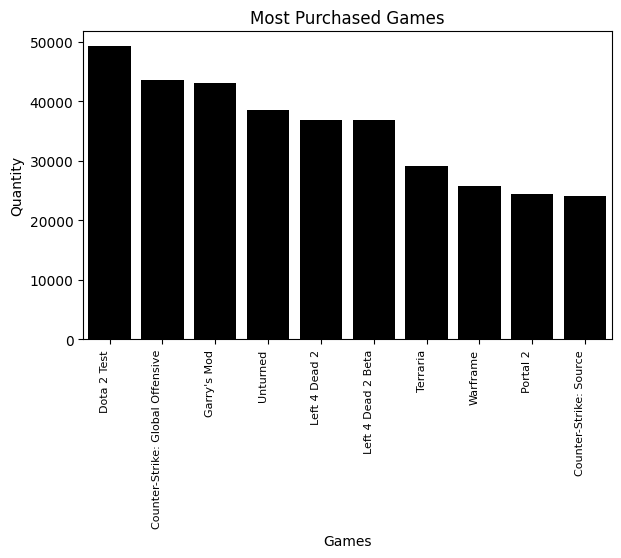

In [4]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.barplot(Items["item_name"].value_counts()[:10],color="black")
plt.xticks(rotation = 90, ha = 'right' , fontsize = 8)
plt.xlabel("Games")
plt.ylabel("Quantity")
plt.title("Most Purchased Games")


In [18]:
time_spend = Items.groupby('user_id')['playtime_forever'].unique().explode()
time_spend = pd.DataFrame(time_spend)
time_spend['Hours Spend Playing'] = time_spend['playtime_forever'] / 60
time_spend['Days Spend Playing'] = (time_spend['Hours Spend Playing'] / 24)
# time_spend['Days Spend Playing'] = time_spend['Days Spend Playing'].round(2)
time_spend_user = time_spend.sort_values('playtime_forever', ascending=False)
time_spend_user

,playtime_forever,Hours Spend Playing,Days Spend Playing
user_id,,,
Cydran,642773.0,10712.883333,446.370139
EucHellscythe,635295.0,10588.25,441.177083
76561198018891278,632452.0,10540.866667,439.202778
poopinya,613411.0,10223.516667,425.979861
76561198048365774,600068.0,10001.133333,416.713889
...,...,...,...
scruffred,0.0,0.0,0.0
76561198070071284,0.0,0.0,0.0
scruffy441,0.0,0.0,0.0


In [20]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.barplot(time_spend["Hours Spend Playing"].value_counts()[:10],color="black")
plt.xticks(rotation = 90, ha = 'right' , fontsize = 8)
plt.xlabel("Games")
plt.ylabel("Hours")
plt.title("Most Purchased Games")

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x00000188AC8649A0> (for post_execute), with arguments args (),kwargs {}:
